In [56]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [59]:
from importlib import reload
import ConcanatePreviousPrediction
reload(ConcanatePreviousPrediction)
from ConcanatePreviousPrediction import GetSelectedDataframe

df_total_residue = None
for fileID in range(100):
    path_evtTruth=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_{fileID}.root"
    path_AP=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/AfterPulsePrediction/root/TagAfterPulse_{fileID}.root"
    path_PSD=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root/user_PSD_{fileID}_SN.root"
    path_IBD=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/root_PromptDelayedSelection/IBD_{fileID}_optimized.root"
    path_CC=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/root_PromptDelayedSelection/CC_{fileID}_optimized.root"
    path_Singles=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/root_PromptDelayedSelection/Isolation_{fileID}_optimized.root"

    df_map = GetSelectedDataframe(path_evtTruth=path_evtTruth,
                                  path_IBD=path_IBD,
                                  path_AP=path_AP,
                                  path_PSD=path_PSD,
                                  path_CC=path_CC,
                                  path_Singles=path_Singles,
                                  inf_from_evtType=["evtType", "R", "recE"],
                                  load_isolationResult=True)
    df_map = df_map[ (df_map["TagAP"]==0) & ( df_map["R"]<17e3 ) ]

    if fileID == 0:
        df_total_residue = df_map
    else:
        df_total_residue = pd.concat( (df_total_residue, df_map) )


df_total_residue


,evtType,R,recE,TagAP,TagIBDp,TagIBDd,IBDSource,psdVal,TagPSD,TagCCp,TagCCd,CCSource,TagSingle
0,pES,6854.586489,0.195969,0,0,0,-1,0.004332,2,0,0,0,0
1,N12,15130.035355,58.678581,0,0,0,-1,0.999876,1,1,0,-1,0
4,IBDp,12277.913790,12.297911,0,1,0,-1,0.996865,1,0,0,0,0
5,IBDd,12755.635839,2.196140,0,0,1,4,0.997891,1,0,0,0,0
6,C12,4395.265212,15.819801,0,0,0,-1,0.989000,1,0,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19276,IBDp,14849.210474,38.097969,0,1,0,-1,0.999865,1,0,0,0,0
19278,IBDd,15155.363461,2.156425,0,0,1,19276,0.998464,1,0,0,0,0
19279,pES,7060.565784,0.607012,0,0,0,-1,0.017325,2,0,0,0,0
19280,IBDp,10829.657779,5.784670,0,1,0,-1,0.999185,1,0,0,0,0


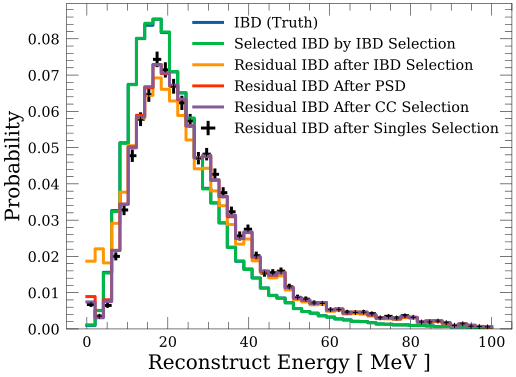

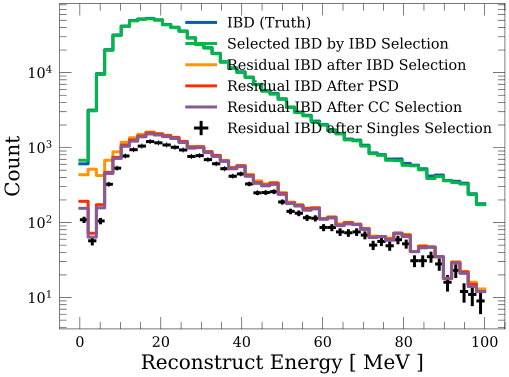

In [60]:
import seaborn as sns
import PlotErrorBar
reload(PlotErrorBar)
from PlotErrorBar import PLotDataWithErrorBar_numpy
# stat = "count"
for stat in ["probability", "count"]:
    plt.figure()
    bins_Erec = np.linspace(0, 100,50)

    h = np.histogram( df_total_residue[ (df_total_residue["TagSingle"]==1) &
                                  ( (df_total_residue["evtType"]=="IBDp") )]["recE"], bins=bins_Erec)
    PLotDataWithErrorBar_numpy(h[0], h[1], density=(False if stat=="count" else True ), color="black", label="Residual IBD after Singles Selection" )

    sns.histplot( df_total_residue[ (df_total_residue["evtType"]=="IBDp") ]["recE"], bins=bins_Erec, stat=stat, fill=False,
                  element="step", label="IBD (Truth)")
    sns.histplot( df_total_residue[ df_total_residue["TagIBDp"]==1]["recE"], bins=bins_Erec,
                  stat=stat, fill=False,element="step", label="Selected IBD by IBD Selection")

    sns.histplot( df_total_residue[ (df_total_residue["evtType"]=="IBDp") &
                                    (df_total_residue["TagIBDp"]==0) &
                                    (df_total_residue["TagIBDd"]==0) &
                                    (df_total_residue["TagAP"]==0)]["recE"], bins=bins_Erec,
                                    stat=stat, fill=False,element="step", label="Residual IBD after IBD Selection")

    sns.histplot( df_total_residue[ (df_total_residue["evtType"]=="IBDp") &
                                    (df_total_residue["TagIBDp"]==0) &
                                    (df_total_residue["TagIBDd"]==0) &
                                    (df_total_residue["TagPSD"]==1) &
                                    (df_total_residue["TagAP"]==0)]["recE"], bins=bins_Erec,
                                    stat=stat, fill=False,element="step", label="Residual IBD After PSD")

    sns.histplot( df_total_residue[ (df_total_residue["evtType"]=="IBDp") &
                                    (df_total_residue["TagIBDp"]==0) &
                                    (df_total_residue["TagIBDd"]==0) &
                                    (df_total_residue["TagCCd"]==0) &
                                    (df_total_residue["TagCCp"]==0) &
                                    (df_total_residue["TagPSD"]==1) &
                                    (df_total_residue["TagAP"]==0)]["recE"], bins=bins_Erec,
                                    stat=stat, fill=False,element="step", label="Residual IBD After CC Selection")

    plt.legend()
    plt.xlabel("Reconstruct Energy [ MeV ]")
    if stat == "count":
        plt.semilogy()

<AxesSubplot:xlabel='recE', ylabel='Count'>

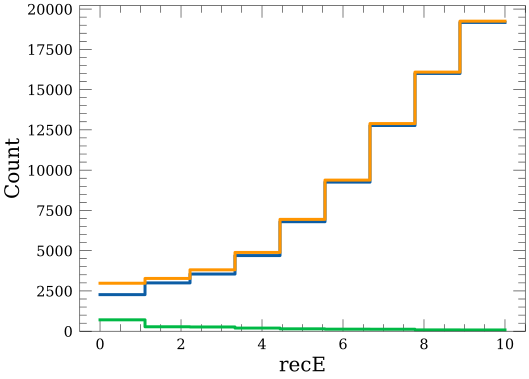

In [67]:
bins_Erec = np.linspace(0,10,10 )
sns.histplot(df_total_residue[ (df_total_residue["TagPSD"]==1) &
                               ( (df_total_residue["evtType"]=="IBDp") |
                                  (df_total_residue["evtType"]=="eES") )
                                ]["recE"],bins=bins_Erec,fill=False, element="step")
sns.histplot(df_total_residue[ (df_total_residue["TagPSD"]==2) &
                               ( (df_total_residue["evtType"]=="IBDp") |
                               (df_total_residue["evtType"]=="eES") )
                               ]["recE"],bins=bins_Erec,fill=False, element="step")
sns.histplot(df_total_residue[ ( (df_total_residue["evtType"]=="IBDp") |
                                (df_total_residue["evtType"]=="eES") )
                               ]["recE"],bins=bins_Erec,fill=False, element="step")
# plt.xlim(0,10)
# plt.semilogy()

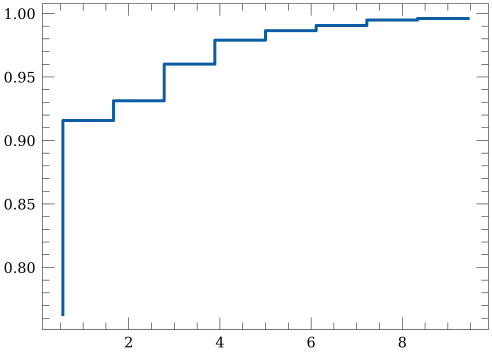

In [68]:
h = np.histogram(df_total_residue[ (df_total_residue["TagPSD"]==1) &
                     ( (df_total_residue["evtType"]=="IBDp") |
                     (df_total_residue["evtType"]=="eES") )
                     ]["recE"], bins=bins_Erec)[0]
h_total_sig = np.histogram(df_total_residue[ ( (df_total_residue["evtType"]=="IBDp") |
                                            (df_total_residue["evtType"]=="eES") )
                                            ]["recE"], bins=bins_Erec)[0]
from HistTools import GetBinCenter
plt.step( GetBinCenter(bins_Erec), h/h_total_sig )